# Method of least squares with a straight line

In this notebook you will learn how to do a linear regression in Python using the method of least squares (without and with weighting of the data points). You will also learn how to calculate statistical quantities like the coefficient of determination $r^2$ and the reduced Chi-squared.

We will apply here the method of least squares to find the best-fit straight line to your experimental data. Suppose you have a set of experimental data  $(x_i,y_i)$. You want to find the best linear fit though these data and find out if the relationship between x and y is linear. To fit the data you use a linear model of the form: $y= b*x +a$, where **b** and **a** are constants which correspond to the slope and the intercept of the straicght line. You need to determine a and b for the best fit line.

We first define the **residuals** as the difference ($y_i - y = y_i - b*x +a$) between the experimental value i of the dependent measured variable $y_i$and the predicted value y from the model.

**The method of least squares consists of minimising the sum of the squares of the residuals!**


**Attention:** In this notebook we will analyze two different data sets. Be careful about the data variables you wish to use and do not mix up the data sets!!!

Before we start with calculations we need (as usual) to import all needed packages:

In [1]:
# import here all the packages we need
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit


**Define general values for some figure parameters:**

Since in the following we will need to make many graphs, we decided to set some parameters (size of title, legends, etc.) at the beginning of the notebook. This way we do not have to specify them in the code each time we make a new graph. You can do so also in your future notebooks.

In [2]:
plt.rcParams['figure.figsize'] = (10,5) # size of figure
plt.rcParams['font.size'] = 16    # fonsize of the text
plt.rcParams['legend.fontsize'] = 14  # set fontsize of the legend
#plt.rcParams['lines.linestyle'] = '--'  # if needed we can specify the type of line style
#plt.rcParams['lines.linewidth'] = 2    #line width


Now consider the following measurements of different masses attached to a spring and of the spring elongation $\Delta s$:

|Δs(cm)|Mass(kg)|
|--|--|
|42.0 | 2|
|48.4 |	4|
|51.3	| 6|
|56.3	| 8|
|58.6	| 10|


## Represent the data in a Pandas dataframe and then make a graph
In the following example we show how to represent data in the pandas dataframe creating a new dataframe from scratch.

In [3]:
spring = {'displacement (cm)': [42.0,48.4,51.3,56.3,58.6],
            'mass (kg)': [2,4,6,8,10]} # we define here the data, by using dictionary and list.
df_spring = pd.DataFrame(data=spring) # the command DataFrame create the pandas dataframe

In [4]:
df_spring.head() # with this command we look at the structure of the dataframe (only the first 5 rows will appear by default)

,displacement (cm),mass (kg)
0,42.0,2
1,48.4,4
2,51.3,6
3,56.3,8
4,58.6,10


In [5]:
print(df_spring.columns) # This commands is used to print the names of the columns


Index(['displacement (cm)', 'mass (kg)'], dtype='object')


We now assign the values of the two columns to x and y:

In [6]:
x_spring = df_spring['mass (kg)'] #assign to x the values in the column 'mass (kg)'
y_spring = df_spring['displacement (cm)'] #assign to y the values in the column 'displacement (cm)'

We now plot the data:

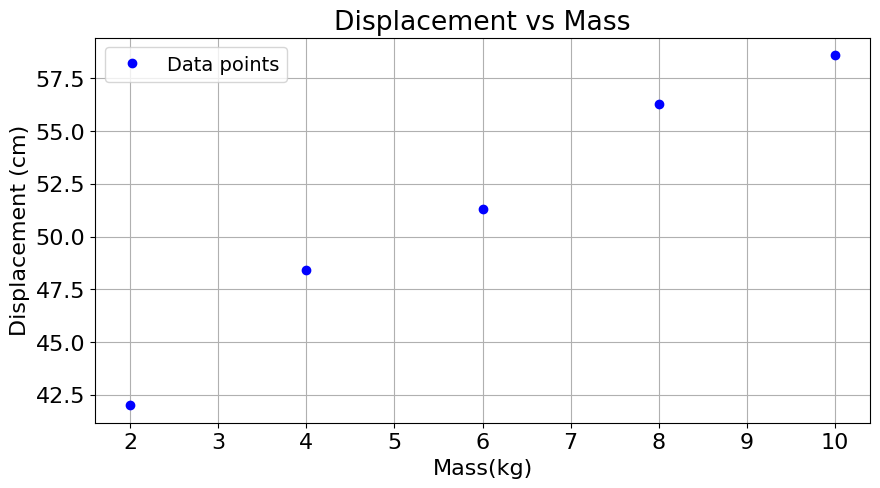

In [7]:
plt.plot(x_spring,y_spring, 'bo', label='Data points')
plt.grid(True)
plt.legend()
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()

### A better way to use the Pandas potentialities for graphing:
You can skip the assignments of x and y by using the Pandas **plot.scatter** method to access directly to dataframe columns, as in the following example:

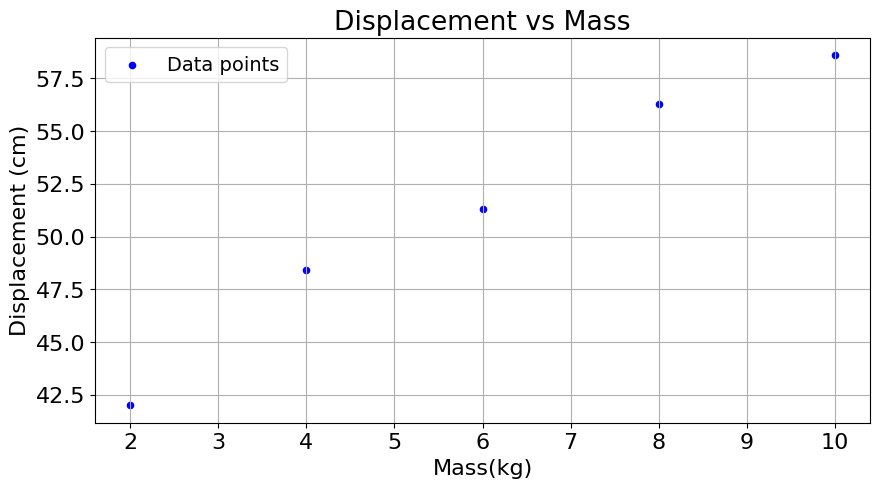

In [8]:
df_spring.plot.scatter('mass (kg)','displacement (cm)', color='blue',label='Data points')
plt.grid(True)
plt.legend()
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title('Displacement vs Mass')
plt.show()

**Exercise 1:**

In an experiment, a stone with initial velocity $v$ is thrown up vertically.
A student performs seven throws to check if the expected relationship between $v^2$ and h is of the form $v^2=2gh.$

The student's data in a Pandas dataframe are shown in the following cell.

Assign h and $v^2$ to the variables x and y and then make a plot of $v^2$ against h including vertical bars associated to uncertainties on y.


In [9]:
#Data
stone = {'h (m)': [0.4,0.8,1.4,2.0,2.6,3.4,3.8], 'v^2 (m/s)^2': [7,17,25,38,45,62,72],
         'Uncertainties on v^2 (m/s)^2':[3,3,3,4,5,5,6]}
         # we define here the data, by using dictionary and list.
stone_df=pd.DataFrame(data=stone)
stone_df.head()

,h (m),v^2 (m/s)^2,Uncertainties on v^2 (m/s)^2
0,0.4,7,3
1,0.8,17,3
2,1.4,25,3
3,2.0,38,4
4,2.6,45,5


To plot the error bar of the $y_i$ data we need to use the **errorbar** function. It works very similar to the plot function.

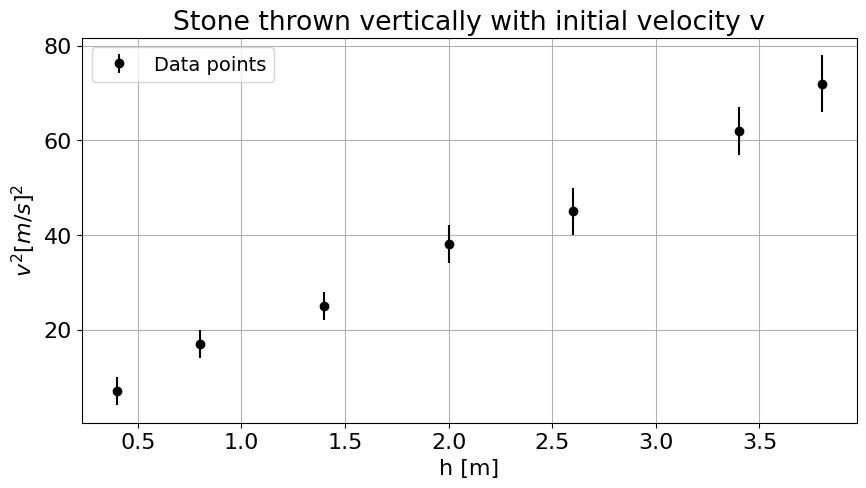

In [10]:
#solution
x_stone=stone_df['h (m)']
y_stone=stone_df['v^2 (m/s)^2']
error_y_stone=stone_df['Uncertainties on v^2 (m/s)^2']
plt.errorbar(x_stone,y_stone,yerr=error_y_stone,color='black',fmt='o',label='Data points')
plt.title("Stone thrown vertically with initial velocity v")
plt.legend(loc='upper left')  # changed the legend location with keyword loc
plt.xlabel('h [m]')
plt.ylabel('$v^2 [m/s]^2$')
plt.grid(True)
plt.show()


### polyfit (optional, you can do this at home if you want)
You could implement your own method for least squares, but Python packages offer various solutions. One is the function [polyfit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html) to calculate the parameters **a** and **b** of the best fit line.
The general syntax is:

```
# np.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
```

the third parameter of the function 'polyfit' is 'deg'. It allows to specify the **degree** of the fitting polynomial.

For a best fit line we will put a value of deg=1.

In the following example we use the 'polyfit' function to to a fit of the spring data.


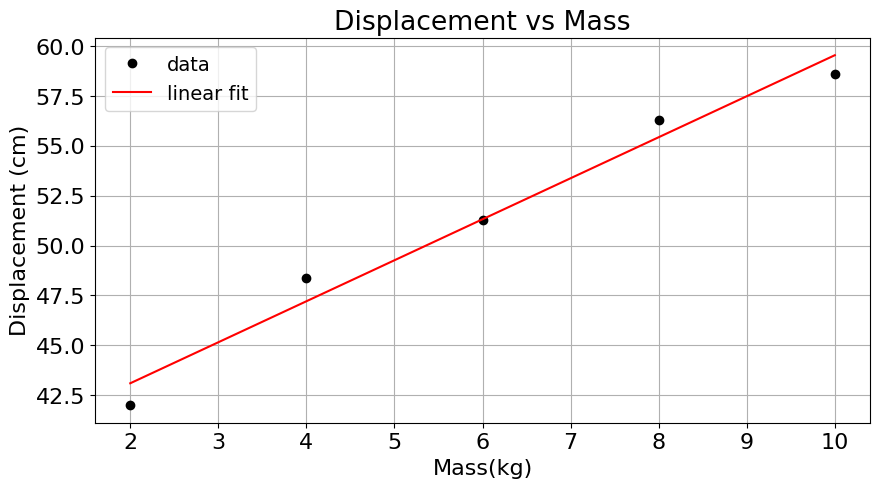

The best fit line has the following parameters: 
======y=bx+a===========

b= 2.05 cm/kg
a=38.99 cm



In [11]:
b, a,  = np.polyfit(x_spring,y_spring,deg=1) # polyfit returns the parameters slope and intercept. Here we assign these parameters to b and a
plt.plot(x_spring, y_spring,'ko', label='data')
plt.plot(x_spring, b*x_spring+a,'r',label='linear fit')
plt.grid(True)
plt.legend()
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()
print("The best fit line has the following parameters: ")
print("======y=bx+a===========\n")
print("b={:5.2f} cm/kg".format(b))
print("a={:5.2f} cm".format(a))
print()

### **End of optional part!!!!! From now on all students must work on the rest of the Notebook.

### Curve_fit
In order to fit any type of function (not only polynomial) one can use the **curve_fit()** function from the **Scipy** package.



```
# from scipy.optimize import curve_fit
# scipy.optimize.curve_fit(func, x, y)
```
The curve_fit() function allows us to define our own fit function, so 'func' in the code above represents the fitting function you want to use.

When you run the code, it will return a numpy array containing two arrays: the first will contain values for the slope b and intercept a that best fit your data, and the second will be the covariance matrix of the optimal fit parameters (see below).




**Comment for future studies**: In the case the fit is non linear, you need to specificy in 'curve_fit' an initial guess for the fit parameters (because the processs is done via iteration). For example you could start with a=1 and b=1.

### Define a (linear) fitting function for using **curve_fit**:

In [12]:
def linear_fit(x,b,a):
    return b*x+a

We apply here the curve_fit function to the data of the spring:

In [13]:
params, params_covariance = curve_fit(linear_fit, x_spring, y_spring)
# the parameters of the linear fit are stored in the array called 'params' (in our case params[0]=b and params[1]=a)
# we also get the covariance matrix and assign it to varaible 'params_covariance'.

The curve_fit function returns two items, which are 'params' and 'params_covariance'.

The 'params' argument corresponds to the best-fit parameters for **b** and **a**. In the following code we print their values:

In [14]:
slope=params[0]
intercept=params[1]
print("The slope of the linear_fit function is:{:5.2f} cm/kg".format(slope))
print("The intercept of the linear_fit function is:{:5.2f} cm".format(intercept))

The slope of the linear_fit function is: 2.06 cm/kg
The intercept of the linear_fit function is:38.99 cm


The second  'params_covariance' corresponds to the covariance matrix (which is a 2x2 matrix). We can extract from the covariance matrix the **uncertainties of the slope and intercept**. They corresponds to the values on the diagonal of the covariance matrix. In the following code we print the **uncertainties on slope and intercept** stored in the params_covariance parameter:

In [15]:
u_slope = np.sqrt(params_covariance [0][0])  # uncertainty on the slope
u_intercept= np.sqrt(params_covariance [1][1]) # uncertainty on the intercept
print("Uncertainty on slope u_b={:5.2f} cm/kg".format(u_slope))
print("Uncertainty on intercept u_a={:5.2f} cm".format(u_intercept))


Uncertainty on slope u_b= 0.19 cm/kg
Uncertainty on intercept u_a= 1.25 cm


Now we plot of the data of the spring and the best fit line from curve_fit:

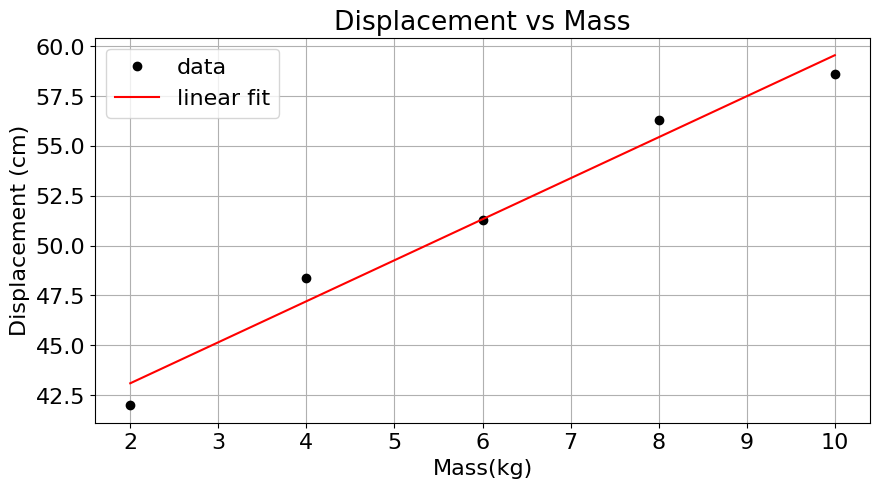

The best fit line has the following parameters: 
======y=bx+a===========

b= 2.06 cm/kg
a=38.99 cm


In [16]:
plt.plot(x_spring, y_spring,'ko', label='data')
plt.plot(x_spring, slope*x_spring+intercept,'r',label='linear fit')
plt.grid(True)
plt.legend(fontsize=16)
plt.xlabel('Mass(kg)', fontsize=16)
plt.ylabel('Displacement (cm)',fontsize=16)
plt.title("Displacement vs Mass")
plt.show()
print("The best fit line has the following parameters: ")
print("======y=bx+a===========\n")
print("b={:5.2f} cm/kg".format(slope))
print("a={:5.2f} cm".format(intercept))


### Calculation of the coefficient of determination $r^2$

In the following code we calculate the coefficient of determination for the example of the spring using a simple formula containing the residuals.

In [17]:
x_data=x_spring
y_data=y_spring

residuals = y_data- linear_fit(x_data,slope,intercept) # here we calculate the residuals
ss_res = np.sum(residuals**2) # here we calculate the sum of the residuals squared
ss_tot = np.sum((y_data-np.mean(y_data))**2) # here we calculate the variance in the y data
r_squared = 1 - (ss_res / ss_tot) # this is the formula to calculate the coefficient of determination
print ("r squared =",r_squared) #here we print put r^2

r squared = 0.9753620343210847


### The residuals
We will see now how the study of the residuals can help to find out if one has systematic errors in the experimental data.
While doing experiments, it is useful to plot the residuals $y_i−bx−a$ . If the best fit line model works well the residuals should have random fluctuations around 0 and show no obvious trend. On the other hand, if the residuals are not randomly distributed around zero, but instead show a trend, we should be careful. In fact if the linear model is right, then a trend in the resuduals is an indication that we have systematic effects in our experimental data. In this case we should take time and effort to solve this issue and remove the systematic effects. Again looking at the residuals will help in this effort.

In the following code, we calculate the residuals for the spring data.

**Comment:** To creates a figure with two or more subplots you can use the matplotlib function **subplots**

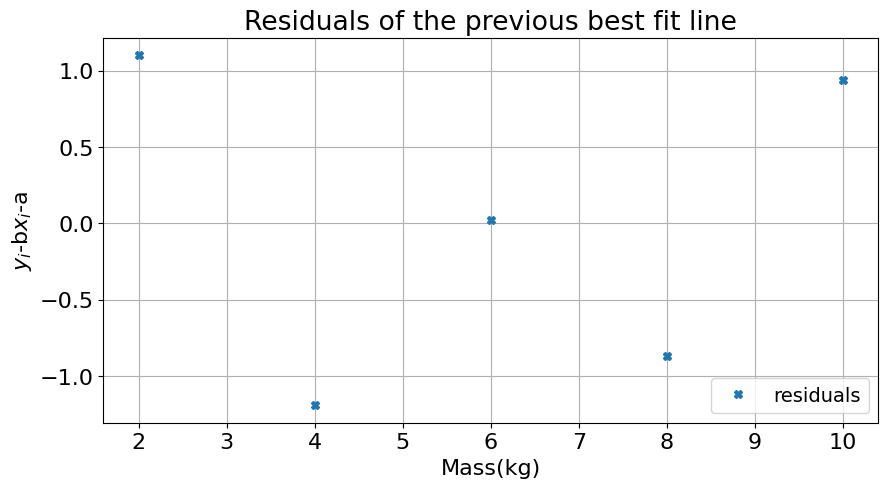

In [18]:
#x_data and y_data and slope and intercept of the associated  fit
x_data=x_spring
y_data=y_spring
residuals=slope*x_data+intercept-y_data
plt.plot(x_data, residuals, 'X', label='residuals')
plt.title("Residuals of the previous best fit line")
plt.xlabel('Mass(kg)')
plt.ylabel('$y_i$-b$x_i$-a')
plt.legend(loc='lower right')
plt.grid()
plt.show()

**Exercise 2:**

Find the best fit line through the points of the the previous exercise (velocity of the stone) and plot it with the data. Find the slope and make a judgment if the result is consistent with the value of $g=9.81 m/s^2$.
We assume that the uncertainties in x are negligible and the uncertainties in y are all equal. Therefore one should use here the least squares method without weighting.
The data are stored in the stone_df dataframe above.

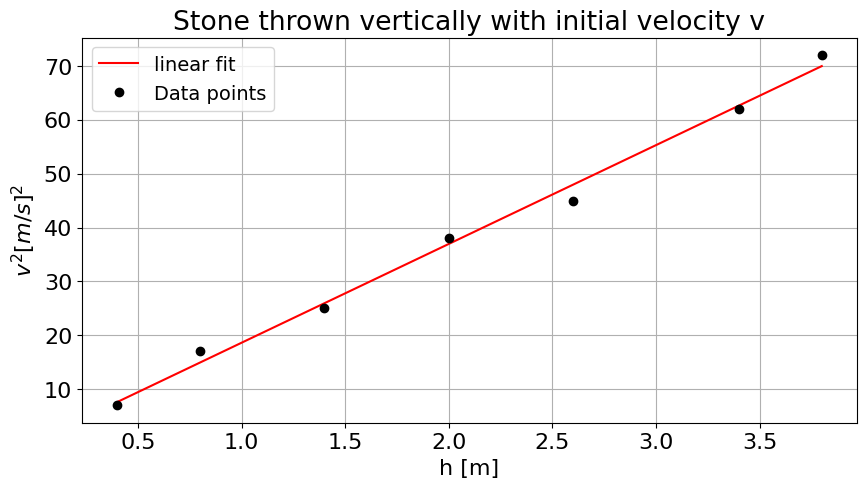

The best fit line has the following parameters: 
==================y=bx+a=======================

The slope of the linear_fit function is:18.35 m/s^2 with uncertainty  0.63 m/s^2
The intercept of the linear_fit function is: 0.25 (m/s)^2  with uncertainty  1.51 (m/s)^2




In [19]:
#Exercise solution
params, params_covariance = curve_fit(linear_fit, x_stone, y_stone)
slope=params[0]
intercept=params[1]
e_slope = np.sqrt(params_covariance [0][0])  #uncertainty on slope
e_inter  = np.sqrt(params_covariance [1][1])  #uncertainty on intercept
#graph and fit
plt.errorbar(x_stone,y_stone,color='black',fmt='o',label='Data points')
plt.plot(x_stone, slope*x_stone+intercept,'r',label='linear fit')
plt.title("Stone thrown vertically with initial velocity v")
plt.legend(loc='upper left')  # changed the legend location with keyword loc
plt.xlabel('h [m]')
plt.ylabel('$v^2 [m/s]^2$')
plt.grid(True)
plt.show()
print("The best fit line has the following parameters: ")
print("==================y=bx+a=======================\n")
print("The slope of the linear_fit function is:{:5.2f} m/s^2 with uncertainty {:5.2f} m/s^2".format(slope,e_slope))
print("The intercept of the linear_fit function is:{:5.2f} (m/s)^2  with uncertainty {:5.2f} (m/s)^2".format(intercept, e_inter))
print("\n")



**Exercise 3:**
Calculate the value of $r^2$ for the stone experiment above.

In [20]:
# solution
x_data=x_stone
y_data=y_stone

residuals = y_data- linear_fit(x_data,slope,intercept)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((y_data-np.mean(y_data))**2)
r_squared = 1 - (ss_res / ss_tot)
print ("r squared",r_squared)

r squared 0.9940719958991769


## Best fit with variable uncertainties (Method of Weighted Least Squares)

Suppose you have a set of N data points $(x_i,y_i)$ and the uncertainties on $x_i$ are negligible while the $y_i$ values have variable estimated uncertainties. We call these uncertainties $\sigma_i$. As you know from the previous lessons in our course, we give in this case a weight $w_i=1/\sigma_i^2$ to each measured $y_i$.
In the following we will fit the data with a linear function $y=bx+a$ using this discussed weighting.

We apply here the method of the weighted least squared to the spring experiment.

Consider the same data set of the spring experiment and add the uncertainties on the measurements of displacements $y_i$ as shown in the following code:

In [21]:
spring_with_uncertainties = {'displacement (cm)': [42.0,48.4,51.3,56.3,58.6],
            'mass (kg)': [2,4,6,8,10],'uncertainties displ. (cm)':[1.2,3.7,2.1,3.4,1.8]}

We define a new pandas dataframe:

In [22]:
df2=pd.DataFrame(data=spring_with_uncertainties)   # defined a new dataframe

and take a look at the dataframe here:

In [23]:
df2.head()

,displacement (cm),mass (kg),uncertainties displ. (cm)
0,42.0,2,1.2
1,48.4,4,3.7
2,51.3,6,2.1
3,56.3,8,3.4
4,58.6,10,1.8


In the following code we assign the variables to the values in the dataframe:

In [24]:
x2= df2['mass (kg)']
y2=df2['displacement (cm)']
yerr2=df2['uncertainties displ. (cm)']

To plot the error bar of the $y_i$ data we use the **errorbar** function.

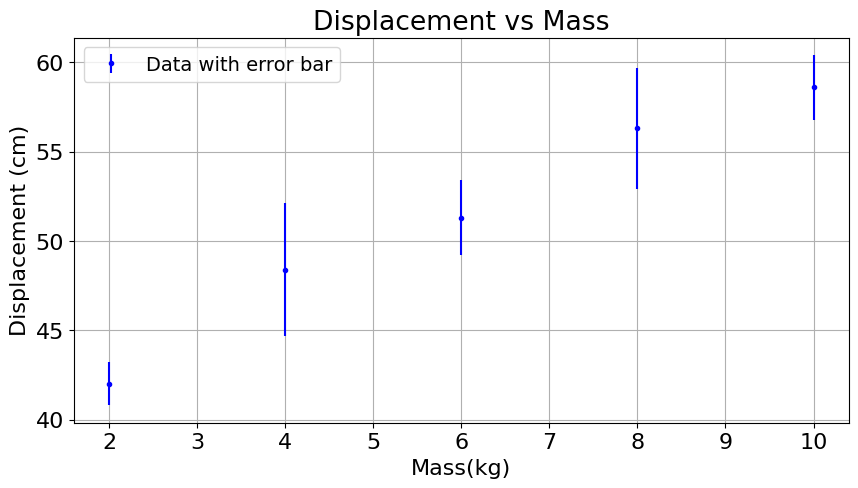

In [25]:
# Create a graph showing the data with error bars
plt.errorbar(x2,y2,yerr2,fmt='b.',label='Data with error bar')
plt.grid(True)
plt.legend(loc="upper left")  # location of the legend
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()

**How to plot error bars in the graph with caps:**

You can also plot the error bars with caps. You just have to add 'capsize = font size' to the plt.errorbar argument. For the example above this would be:

```
plt.errorbar(x2,y2,yerr2,fmt='b.',label='Data with error bar', capsize=10)
```
Try the result yourself!

We now extend the **curve_fit** function used earlier by adding the argument 'sigma=yerr'. We also have to add the declaration 'absolute_sigma=True':



In [26]:
params, params_covariance = curve_fit(linear_fit, x2, y2,sigma=yerr2,absolute_sigma=True)
print(params) #Optimal values for the parameters so that the sum of the squared residuals is minimized.
print(params_covariance)   #The estimated covariance of params

[ 2.11443674 38.05309837]
[[ 0.06652116 -0.32653028]
 [-0.32653028  2.32256645]]


The 'params' variable contains the values of parameters **b** and **a** ($params[0]$  and  $params[1]$ ) for best fit. So that we actually will get:

$ y =params[0]* x +params[1]$


The params_covariance variable contains the covariance (2x2) matrix, from whioch we can calculate the uncertainties on the slope and intercept. The covariance matrix is of the form:
$$ \left(
\begin{array}
\ C_{00} & C_{10} \\
 C_{01} & C_{11}
\end{array}\right)$$

We are interested in the diagonal elements of this matrix, where for instance the uncertainty on the intercept (params[1]) is:

$$\sigma_{params[1]}=\sqrt{C_{11}}$$

and the uncertainty on the slope is:

$$\sigma_{params[0]}=\sqrt{C_{00}}$$

The other two elements of the covariance matrix describe the covariance between the two different parameters (slope and intercept), but their use is beyond the scope of this course.


See Ref. [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html)

In [27]:
slope = params[0] # slope b
intercept = params[1]   # intercept a
u_slope= np.sqrt(params_covariance[0][0]) # uncertainty in the slope
u_intercept = np.sqrt(params_covariance[1][1])   # uncertainty in the intercept
print("slope=", slope, "cm/kg\n", "u_slope=",u_slope, "cm/kg\n", "intercept=", intercept,"cm\n", "u_intercept=",u_intercept, "cm\n") #the symbol \n is used to insert a new line

slope= 2.1144367388233323 cm/kg
 u_slope= 0.25791696530219727 cm/kg
 intercept= 38.053098371458425 cm
 u_intercept= 1.523996865194833 cm



Now we create a graph showing the data and fit line of the new fit:

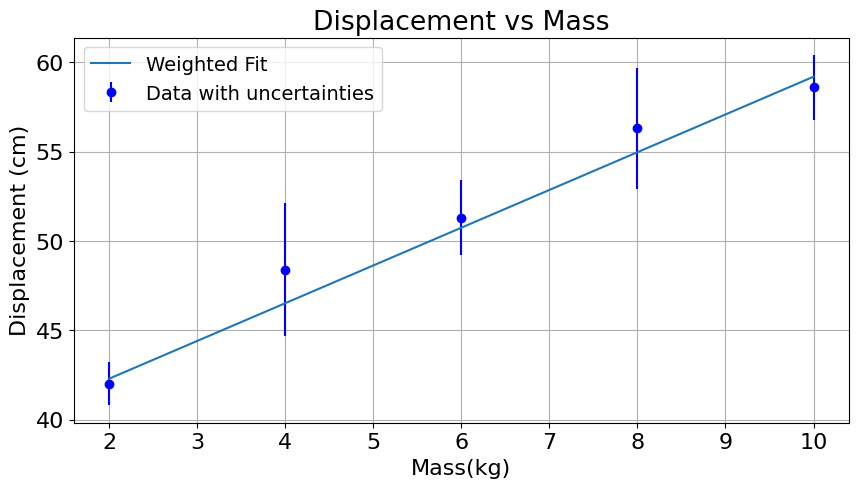

In [28]:
 #Create a graph showing the data and error bar
plt.errorbar(x2,y2,yerr2,fmt='bo',label='Data with uncertainties')

# Create a graph of the best fit line to the data.

plt.plot(x2,slope*x2+intercept,label='Weighted Fit')
plt.grid()
plt.legend()
#plt.legend(loc='upper left') # with the 'loc' paramter you can choose where locate the legend
plt.xlabel('Mass(kg)')
plt.ylabel('Displacement (cm)')
plt.title("Displacement vs Mass")
plt.show()

To display the result of the best fit we can also write:

In [29]:
print('The slope is b ={:5.1f} cm/kg, with uncertainty {:5.1f} cm/kg'.format(slope,u_slope))
print('The intercept is  a= {:5.1f} cm, with uncertainty {:5.1f} cm'.format(intercept,u_intercept))

The slope is b =  2.1 cm/kg, with uncertainty   0.3 cm/kg
The intercept is  a=  38.1 cm, with uncertainty   1.5 cm


## Chi-squared and Reduced Chi-squared

In the following we will calculate the Chi-squared and reduced Chi-squared values. The **Chi-squared** is defined as follow:




$$χ^2 = \sum_{i=1}^nw_i[y_i-(bx_i+a)]^2$$

The **reduced chi squared** is defined as:


$$\chi_{r}^2 = \frac{χ^2}{d} = \frac{χ^2}{N-2}$$


The d in the denominator corresponds to the number of **degrees of freedom** of the fit (often denoted with **DoF**). This is equal to the number of measurements N minus the number of parameters calculated in the fit. In the case of a linear fit d is equal to N-2 (2 because we have two parameters, the slope and the intercept).

As you know, a good fit is one for which


**$\chi_{r}^2$ $\approx$ 1**



In the following code we define a function that calculates the **reduced chi-squared**:

In [30]:
def reduced_chi_square(x, y, yerr, f, *args):
    '''reduced Chi-Squared function     # in Python triple quotation marks represents a more general category of comments, named 'docstrings'. It is used in function or module definition.
    x, y and yerr are numpy arrays, referring to x, y and yerr data
    f is the function we are fitting.
    args are the arguments of the function we have fit.
    '''
    return 1/(len(x)-len(args))*np.sum((f(x, *args)-y)**2/yerr**2)

**Exercise 'Try it yourself':**
Digit help(reduced_chi_square), what do you read?

In [31]:
#solution
help(reduced_chi_square)

Help on function reduced_chi_square in module __main__:

reduced_chi_square(x, y, yerr, f, *args)
    reduced Chi-Squared function     # in Python triple quotation marks represents a more general category of comments, named 'docstrings'. It is used in function or module definition.
    x, y and yerr are numpy arrays, referring to x, y and yerr data
    f is the function we are fitting.
    args are the arguments of the function we have fit.



Now we calculate the reduced chi squared for the data of spring with uncertainties:

In [32]:
reduced_chi_square(x2,y2,yerr2,linear_fit, *params)

0.21686948611274193

**Exercise 4:**

Find the **weighted** best fit line for the stone experiment above and plot your results. Find the slope and discuss if the results are consistent with the value of  $g=9.81m/s^2$ . Calculate the reduced chi squared as well. Notice that the data are stored in the stone_df dataframe.

In [33]:
#Solution part 1
params, params_covariance = curve_fit(linear_fit, x_stone, y_stone,sigma=error_y_stone,absolute_sigma=True)
print(params) #Optimal values for the parameters so that the sum of the squared residuals is minimized.
slope = params[0] # slope b
intercept = params[1]   # intercept
u_intercept = np.sqrt(params_covariance[1][1]) # see above
u_slope = np.sqrt(params_covariance[0][0])   #see above
print(params_covariance)

[18.17440549  0.58972722]
[[ 1.83372795 -2.76525743]
 [-2.76525743  6.1556603 ]]


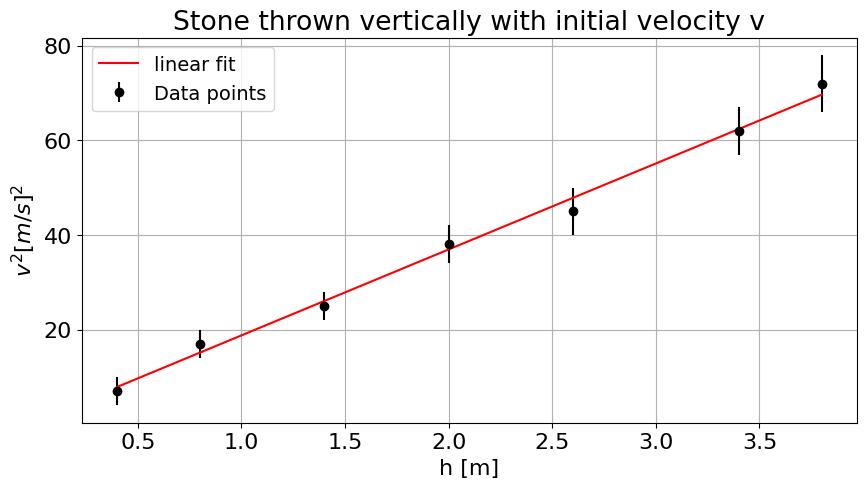

The best fit line has the following parameters: 
==================y=bx+a=======================

The slope of the linear_fit function is:18.17 m/s^2 with uncertainty  1.35 m/s^2
The intercept of the linear_fit function is: 0.59 (m/s)^2  with uncertainty  2.48 (m/s)^2
====================Chi square==================

The reduced chi square is equal to:  0.23


In [34]:
##Solution part 2
#graph and fit
plt.errorbar(x_stone,y_stone,yerr=error_y_stone,color='black',fmt='o',label='Data points')
plt.plot(x_stone, slope*x_stone+intercept,'r',label='linear fit')
plt.title("Stone thrown vertically with initial velocity v")
plt.legend(loc='upper left')  # changed the legend location with keyword loc
plt.xlabel('h [m]')
plt.ylabel('$v^2 [m/s]^2$')
plt.grid(True)
plt.show()
print("The best fit line has the following parameters: ")
print("==================y=bx+a=======================\n")
print("The slope of the linear_fit function is:{:5.2f} m/s^2 with uncertainty {:5.2f} m/s^2".format(slope,u_slope))
print("The intercept of the linear_fit function is:{:5.2f} (m/s)^2  with uncertainty {:5.2f} (m/s)^2".format(intercept, u_intercept))
print("====================Chi square==================\n")
#yerr=error_y_fall
print("The reduced chi square is equal to: {:5.2f}".format(reduced_chi_square(x_stone,y_stone,error_y_stone,linear_fit, *params)))

**Important Note:** In the last example (of the reduced Chi-squared), we have defined a function to calculate the reduced Chi-squared. To optimize the other codes of this notebook, you could also define functions for the calculation of the R^2 and for making plots...

In a separate notebook on Moodle, you can find an example for using the **curve_fit** function in a physics experiment. In this experiment, we use the curve_fit function to find the relationship between the illuminance of a light bulb as a function of distance from a smartphone light sensor. You can on your own take a look at this notebook.

## Conclusion:

CONGRATULATIONS!!!!!!!! You arrived at the end of this introduction to Jupyter Notebooks and Python programming :-).


We hope you feel now confortable to use Jupyter Notebooks in the future. Of course, we do not expect you to be already 'fluent' in Phyton programming, but at least motivated to continue practicing with it!
You can use the notebooks we provided you in the future for your lab activities as a guide.

Best,
     
    ````´´´´´        -------
      I   I         !  0 0  !
        .           !   °   !
     ^^^^^^^        !  ---  !
     
     Eugenio   and    Micol

## **Attention:**

Vergessen Sie nicht ihr Notebook zu speichern bevor Sie es schließen!!! Nachdem Sie das Notebook gespeichert haben, muss das Notebook zu einem PDF konvertiert werden. Laden Sie beide Dateien PDF und das originale Jupiter Notebook (Die Dateiendung ist '.ipynb') auf Moodle hoch.

Um das Notebook zum PDF zu konvertieren gibt es merhere Wege, die sich jede nach Umgebung unterscheiden. Wir stellen hier die drei Möglichkeiten, für Anaconda/Jupiter-Notebooks, Google Colab sowie für die Browser-Anwendung von Jupyter.org/JupyterLab.

**Anaconda/JupyterNotebooks:** Um das Notebook zu speichern klicken Sie auf 'Files'/'Datei' und dort auf 'Download as Notebook (.ipynb)'/'Speichern als Notebook (.ipynb)'. Um das Notebook zum PDF zu konvertieren klicken Sie auf 'Files'/'Datei' und drücken Sie dort auf 'print preview' und Drucken Sie es anschließend als PDF.  

**Google Colab:** Um das Notebook herunterzuladen klicken Sie hier auf 'Files' und wählen Sie 'download .ipynb' aus. Um das Notebook zum PDF zu konvertieren klicken Sie auf 'Files'/'Datei' und drücken Sie dort auf 'print preview' und Drucken Sie es anschließend als PDF.

**Webbrowser Anwedung Jupyter.org (Hier sollten Sie JupyterLab verwenden!!!!)**: Um das Notebook herunterzuladen klicken Sie auf 'Files' und wählen Sie 'download'. Um es zu einem PDF zu konvertieren gehen Sie auf 'File', wählen Sie 'print' und danach 'print pdf'.